# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 3. Сравнение оценок и эффективные оценки

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача в этом задании оценивается в **15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [132]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/any/Programs/statistics_practice_mipt/myenv/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [133]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

sample_norm = norm_distr.rvs(size=N)
sample_laplacian = laplacian_distr.rvs(size=N)
sample_cauchy = cauchy_distr.rvs(size=N)

Постройте график плотности распределения для всех трех распределений на одних осях.

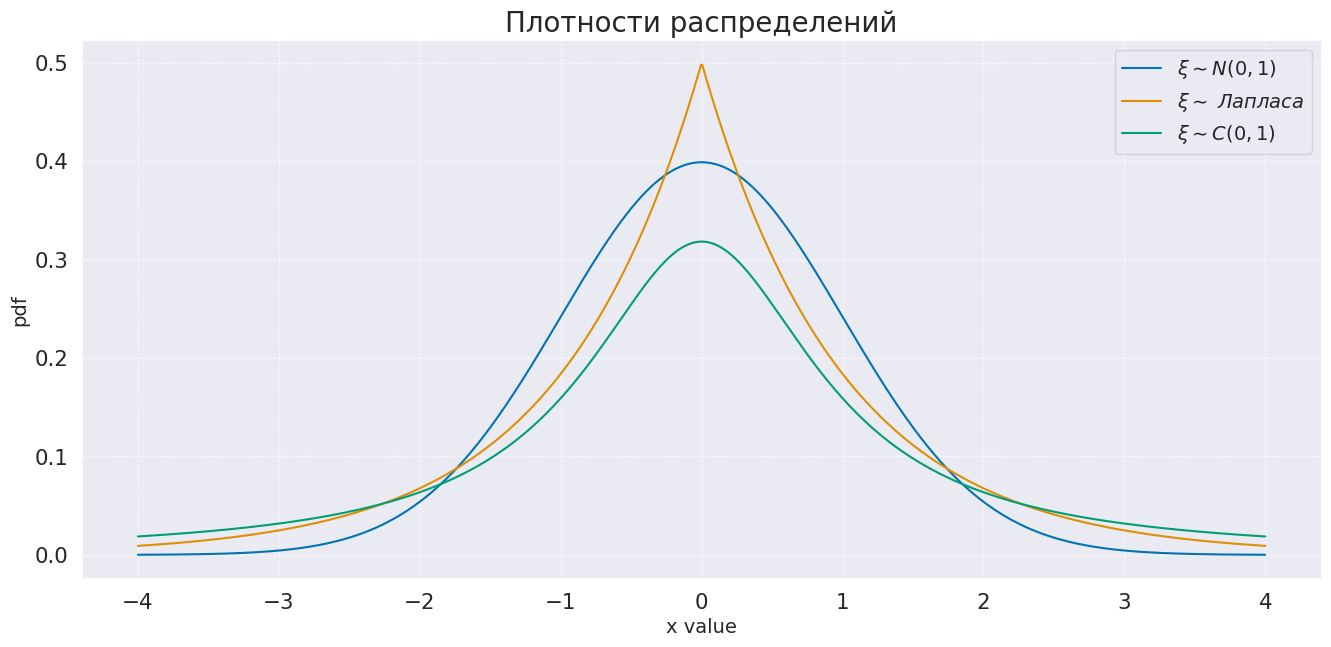

In [134]:
grid = np.linspace(-4, 4, 1000)
plt.figure(figsize=(16, 7))
plt.plot(grid, norm_distr.pdf(grid), color=color_for_normal, label=r'$\xi \sim N(0, 1)$') 
plt.plot(grid, laplacian_distr.pdf(grid), color=color_for_laplace, label=r'$\xi \sim\; Лапласа$') 
plt.plot(grid, cauchy_distr.pdf(grid), color=color_for_cauchy, label=r'$\xi \sim C(0, 1)$') 
plt.title("Плотности распределений", fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.xlabel('x value', fontsize=14)
plt.ylabel('pdf', fontsize=14)
plt.grid(ls=':')

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** Сложнее всего найти значение математического ожидания для распределения Коши, потому что у него тяжелые хвосты, которые могут сильно влиять на среднее в зависимости от выборки

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [135]:
import math

def truncated_mean(sample, alpha=0.3):
    sample_sort = np.sort(sample)
    return np.mean(sample_sort[int(alpha * len(sample_sort)) : len(sample_sort) - int(alpha * len(sample_sort))])

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [136]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    return 2 * (quad(lambda x: (x ** 2) * distr.pdf(x), 0, distr.ppf(1 - alpha))[0] + alpha * (distr.ppf(1 - alpha) ** 2)) / (1 - 2 * alpha) ** 2

Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на разных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для заголовка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

/tmp/ipykernel_5778/1962345839.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


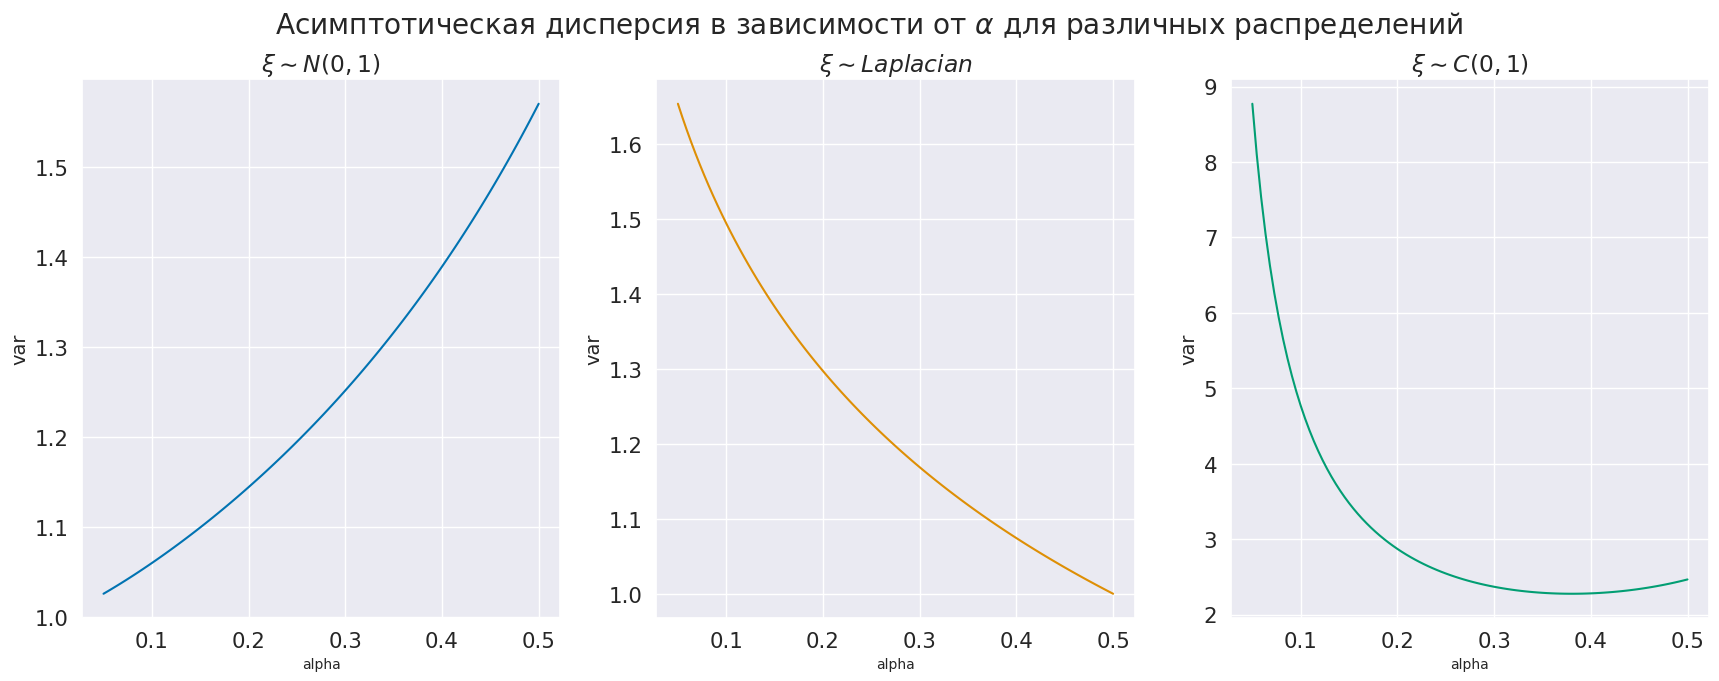

In [137]:
alpha_grid = np.linspace(0.05, 0.49999, 100)

norm_disp = np.array([asymp_var(norm_distr, alpha) for alpha in alpha_grid])
laplacian_disp = np.array([asymp_var(laplacian_distr, alpha) for alpha in alpha_grid])
cauchy_disp = np.array([asymp_var(cauchy_distr, alpha) for alpha in alpha_grid])

fig, ax = plt.subplots(1, 3, figsize=(21,7))

ax[0].plot(alpha_grid, norm_disp, c=color_for_normal)
ax[0].set_title(r'$\xi \sim N(0, 1)$')
ax[0].set_xlabel('alpha', fontsize=10)
ax[0].set_ylabel('var', fontsize=14)
ax[1].plot(alpha_grid, laplacian_disp, c=color_for_laplace)
ax[1].set_title(r'$\xi \sim Laplacian$')
ax[1].set_xlabel('alpha', fontsize=10)
ax[1].set_ylabel('var', fontsize=14)
ax[2].plot(alpha_grid, cauchy_disp, c=color_for_cauchy)
ax[2].set_title(r'$\xi \sim C(0, 1)$')
ax[2].set_xlabel('alpha', fontsize=10)
ax[2].set_ylabel('var', fontsize=14)
fig.suptitle(r'Асимптотическая дисперсия в зависимости от $\alpha$ для различных распределений')
fig.show()

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:** 0.5 - ас. дисперсия для медианы, 0 - ас. дисперсия для всей выборки.  
Для нормального распределения ас. дисперсия возрастает при увеличении $\alpha$, то есть при уменьшении выборки, а для всей выборки она сравнительно мала.  
Для распределения лапласиана все происходит наоборот и асимптотическая дисперсия уменьшается, то есть для медианы она является самой маленькой.  
Для распределения Коши ситуация похожа на предыдущую, только зависимость больше квадратичная, по сравнению с прошлыми случаями, и минимума ас. дисперсия достигает не в медиане, а при $\alpha = 0.35$ примерно

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [138]:
median_norm = np.array([np.median(sample_norm[:n]) for n in range(1, N + 1)])
mean_norm = np.array([np.mean(sample_norm[:n]) for n in range(1, N + 1)])
truncated_mean_norm = np.array([truncated_mean(sample_norm[:n], alpha=0.35) for n in range(1, N + 1)])

median_laplace = np.array([np.median(sample_laplacian[:n]) for n in range(1, N + 1)])
mean_laplace = np.array([np.mean(sample_laplacian[:n]) for n in range(1, N + 1)])
truncated_mean_laplace = np.array([truncated_mean(sample_laplacian[:n], alpha=0.35) for n in range(1, N + 1)])

median_cauchy = np.array([np.median(sample_cauchy[:n]) for n in range(1, N + 1)])
mean_cauchy = np.array([np.mean(sample_cauchy[:n]) for n in range(1, N + 1)])
truncated_mean_cauchy = np.array([truncated_mean(sample_cauchy[:n], alpha=0.35) for n in range(1, N + 1)])

**Нормальное распределение**

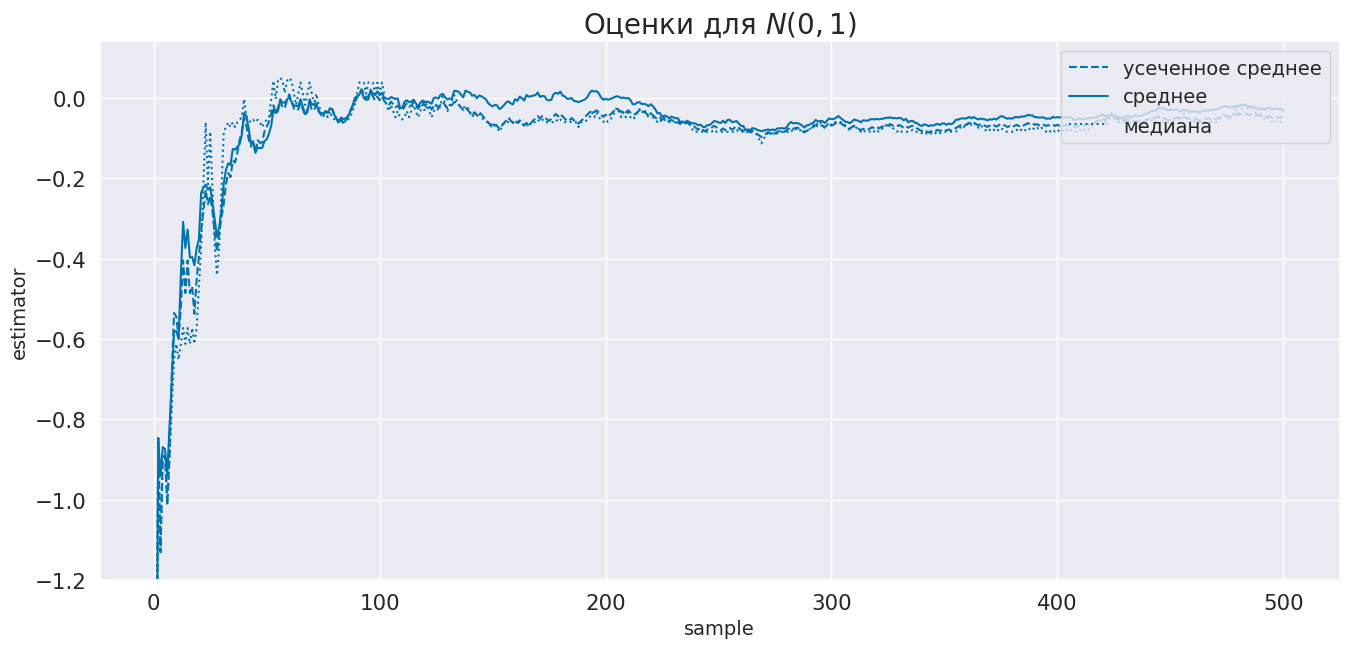

In [139]:
grid = np.arange(1, N + 1)
plt.figure(figsize=(16, 7))
plt.plot(grid, truncated_mean_norm, linestyle='--', color=color_for_normal, label='усеченное среднее') 
plt.plot(grid, mean_norm, color=color_for_normal, label='среднее') 
plt.plot(grid, median_norm, linestyle=':', color=color_for_normal, label='медиана') 
plt.title(r'Оценки для $N(0, 1)$', fontsize=20)
plt.ylim(bottom=-1.2)
plt.xlabel('sample', fontsize=14)
plt.ylabel('estimator', fontsize=14)
plt.legend(fontsize=14, loc=1)

**Распределение Лапласа**

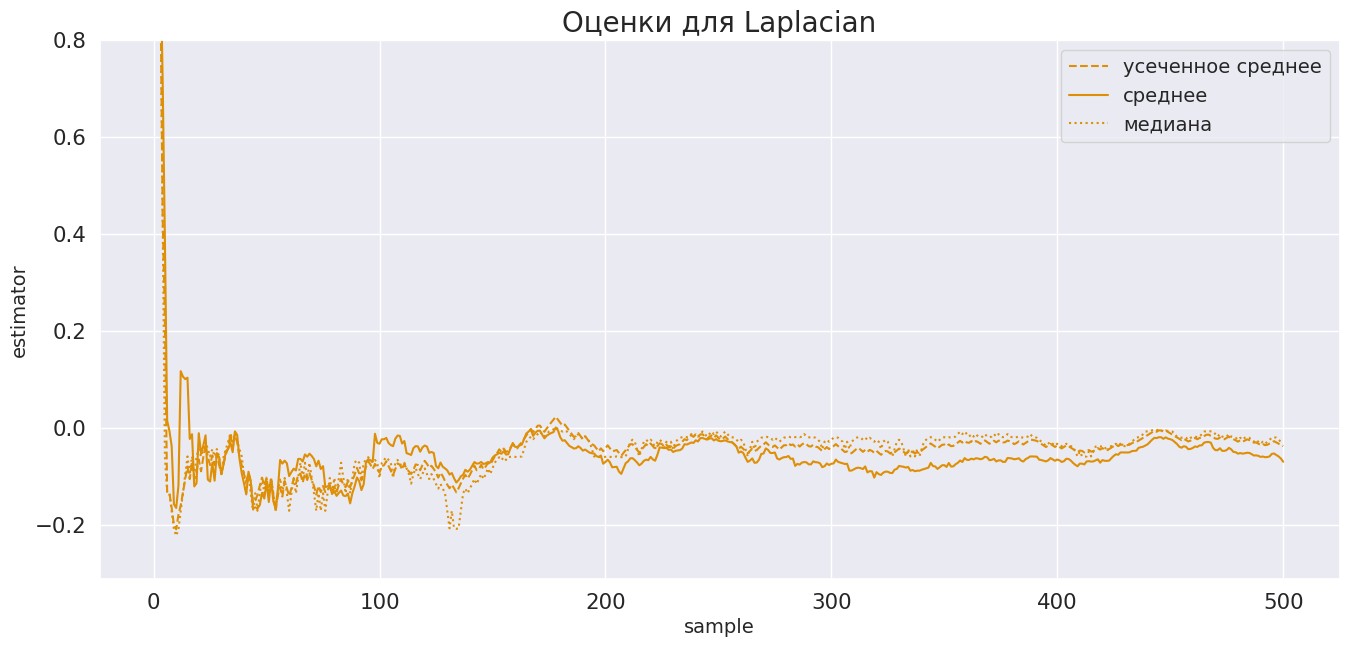

In [140]:
grid = np.arange(1, N + 1)
plt.figure(figsize=(16, 7))
plt.plot(grid, truncated_mean_laplace, linestyle='--', color=color_for_laplace, label='усеченное среднее') 
plt.plot(grid, mean_laplace, color=color_for_laplace, label='среднее') 
plt.plot(grid, median_laplace, linestyle=':', color=color_for_laplace, label='медиана') 
plt.title(r'Оценки для Laplacian', fontsize=20)
plt.ylim(top=0.8)
plt.xlabel('sample', fontsize=14)
plt.ylabel('estimator', fontsize=14)
plt.legend(fontsize=14, loc=1)

**Распределение Коши**

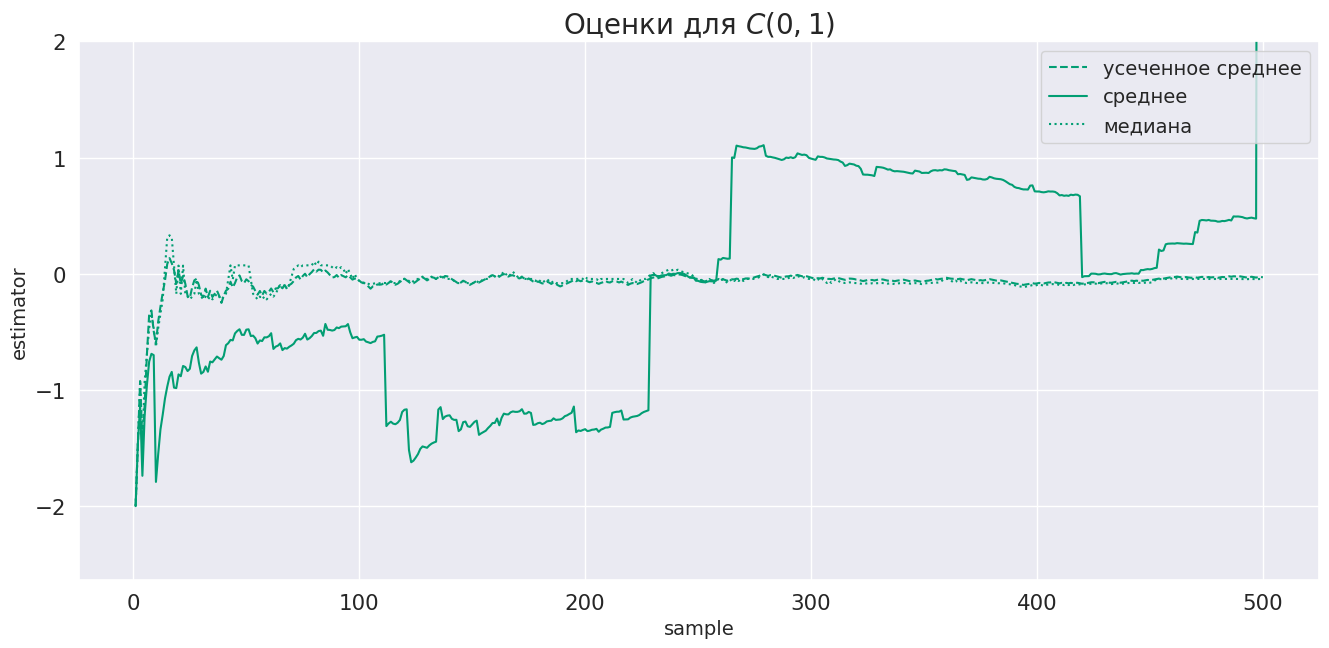

In [141]:
grid = np.arange(1, N + 1)
plt.figure(figsize=(16, 7))
plt.plot(grid, truncated_mean_cauchy, linestyle='--', color=color_for_cauchy, label='усеченное среднее') 
plt.plot(grid, mean_cauchy, color=color_for_cauchy, label='среднее') 
plt.plot(grid, median_cauchy, linestyle=':', color=color_for_cauchy, label='медиана') 
plt.title(r'Оценки для $C(0, 1)$', fontsize=20)
plt.ylim(top=2)
plt.xlabel('sample', fontsize=14)
plt.ylabel('estimator', fontsize=14)
plt.legend(fontsize=14, loc=1)

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:** Графики подтвержают гипотезу, которую мы сформулировали раньше. Так например для нормального распределения среднее больше медианы и усеченного среднего, как это было в прошлом графике для ас. дисперсии (для всей выборки она была самой большой), а для распределения Лапласа отчетливо видно, что все наоборот. С Коши сказать труднее, потому что тут меняется в зависимости от размера выборки.

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [142]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

In [143]:
import pandas as pd

In [144]:
data = pd.read_csv("winequality-red.csv")

In [145]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [146]:
data['category'] = ''
data.loc[data['alcohol'] <= 10, 'category'] = 'low alcohol'
data.loc[data['alcohol'] > 10, 'category'] = 'medium alcohol'
data.loc[data['alcohol'] > 12, 'category'] = 'high alcohol'

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [147]:
mean_low = data[data['category'] == 'low alcohol']['residual sugar'].mean()
median_low = data[data['category'] == 'low alcohol']['residual sugar'].median()
mean_medium = data[data['category'] == 'medium alcohol']['residual sugar'].mean()
median_medium = data[data['category'] == 'medium alcohol']['residual sugar'].median()
mean_high = data[data['category'] == 'high alcohol']['residual sugar'].mean()
median_high = data[data['category'] == 'high alcohol']['residual sugar'].median()

raw_data = {'mean_residual_sugar': [mean_low, mean_medium, mean_high],
        'median_residual_sugar': [median_low, median_medium, median_high]}
data_sugar = pd.DataFrame(raw_data, index = ['low alcohol', 'medium alcohol', 'high alcohol'])
data_sugar

,mean_residual_sugar,median_residual_sugar
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2
high alcohol,2.760993,2.3


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Чем крепче алкоголь, тем больше сахара в нем. В среднем содержание сахара почти везде одинаковое и около 2.6

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

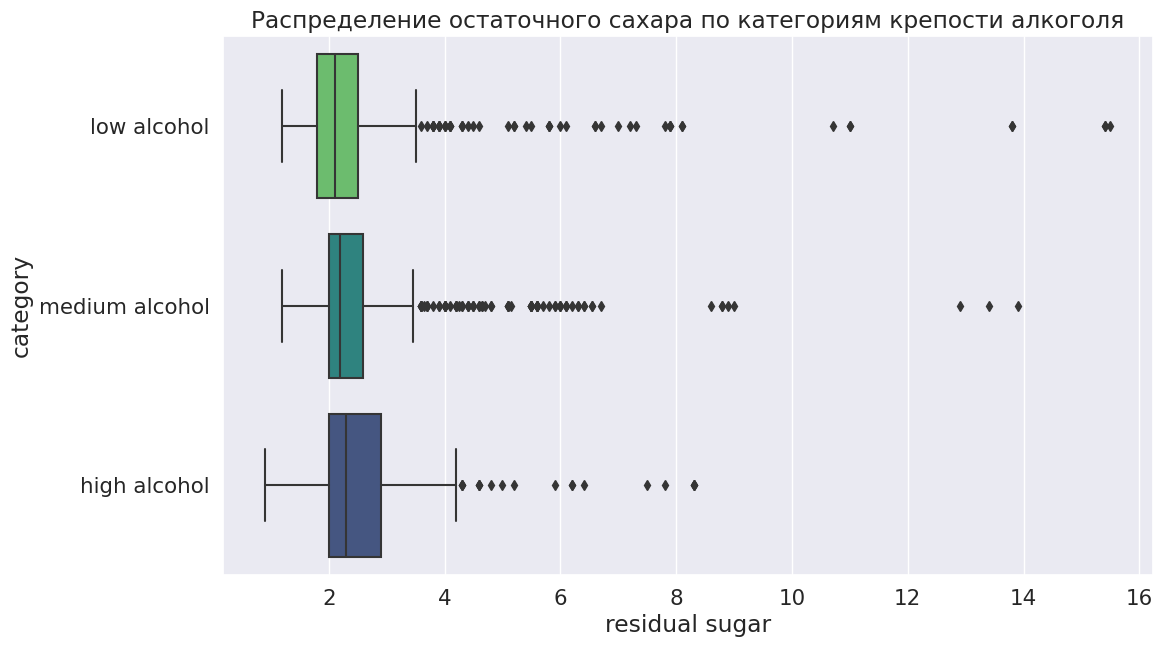

In [148]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
plt.figure(figsize=(12,7))
ax = sns.boxplot(data=data, x='residual sugar', y='category', palette=palette).set(title='Распределение остаточного сахара по категориям крепости алкоголя')
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:** В таблице и на графике мы четко видим одни и те же медианы и среднее тоже совпадает. Лучше использовать медиану, потому что видно, что в распределении остаточного сахара есть большие выбросы, которые могут сильно повлиять на среднее

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

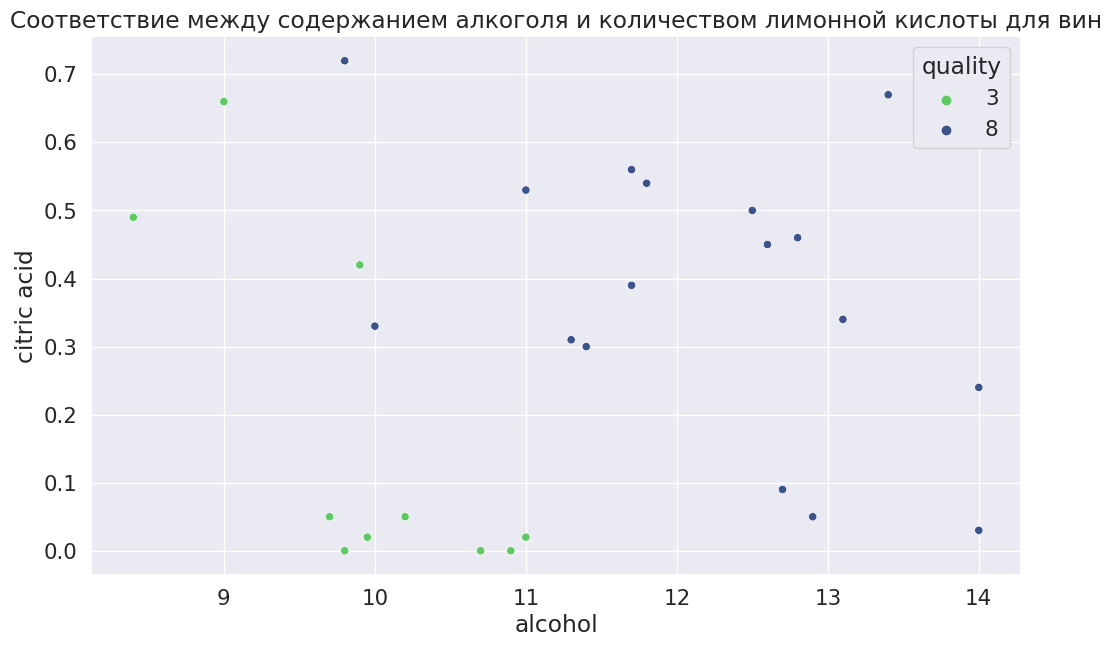

In [149]:
plt.figure(figsize=(12,7))

ax = sns.scatterplot(data=data[(data['quality'] == 3) | (data['quality'] == 8)], x='alcohol', y='citric acid', hue='quality', palette=[palette[0]]+[palette[-1]]).set(title='Соответствие между содержанием алкоголя и количеством лимонной кислоты для вин')
plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [150]:
very_bad = (data[data['quality'] == 3][['alcohol', 'citric acid']]).to_numpy()
very_good = (data[data['quality'] == 8][['alcohol', 'citric acid']]).to_numpy()

In [151]:
mean_first = np.mean(very_bad, axis=0)
cov_first = np.cov(very_bad.T)
# cov_first = np.array([(very_bad[i] - mean_first).reshape(2, 1) @ (very_bad[i] - mean_first).reshape(1, 2) for i in range(len(very_bad))]).sum(axis=0) / len(very_bad)
print("estimator bad wines: ", "mean: ", mean_first, "\ncov: ", cov_first)


estimator bad wines:  mean:  [9.955 0.171] 
cov:  [[ 0.66913889 -0.15500556]
 [-0.15500556  0.06283222]]


In [152]:
mean_second = np.mean(very_good, axis=0)
cov_second = np.cov(very_good.T)
# cov_second = np.array([(very_good[i] - mean_second).reshape(2, 1) @ (very_good[i] - mean_second).reshape(1, 2) for i in range(len(very_good))]).sum(axis=0) / len(very_good)
print("estimator bad wines: ", "mean: ", mean_second, "\ncov: ", cov_second)

estimator bad wines:  mean:  [12.09444444  0.39111111] 
cov:  [[ 1.49820261 -0.11240523]
 [-0.11240523  0.03981046]]


Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [153]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

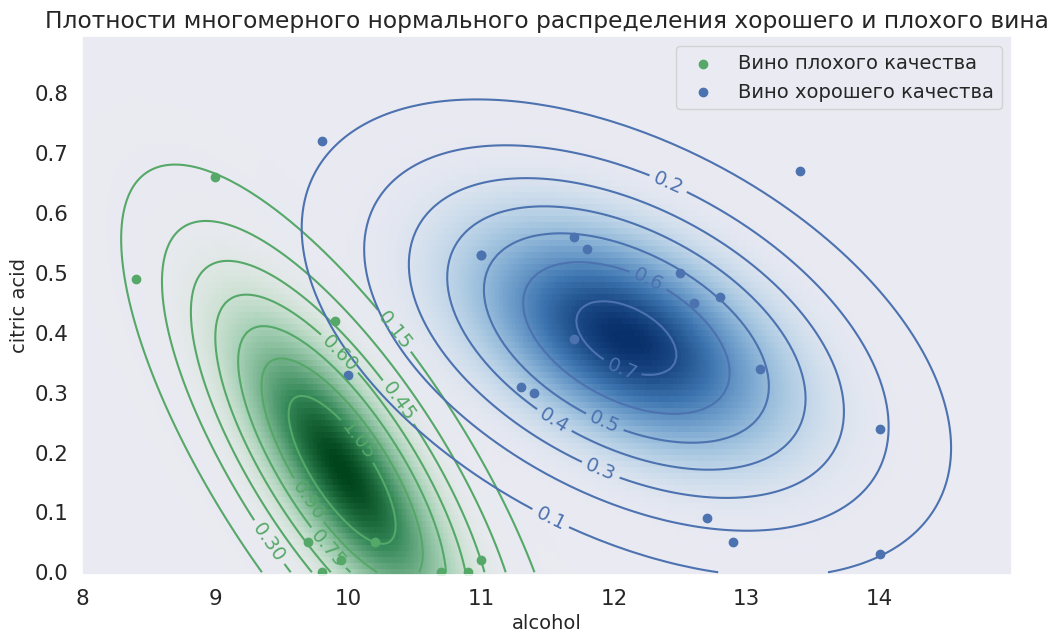

In [154]:
X, Y = np.mgrid[8:15:0.01, 0:0.9:0.01]
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
pdf_first = sps.multivariate_normal(mean_first, cov_first)
pdf_second = sps.multivariate_normal(mean_second, cov_second)

plt.figure(figsize=(12,7))
plt.pcolormesh(X, Y, pdf_first.pdf(pos), cmap=get_density_cmap("Greens"))
plt.pcolormesh(X, Y, pdf_second.pdf(pos), cmap=get_density_cmap("Blues"))
plt.scatter(very_bad[:, 0], very_bad[:, 1], c='g', label="Вино плохого качества")
plt.scatter(very_good[:, 0], very_good[:, 1], c='b', label="Вино хорошего качества")
CS_bad = plt.contour(X, Y, pdf_first.pdf(pos), colors='g')
plt.clabel(CS_bad, fontsize=14, inline=1)
CS_good = plt.contour(X, Y, pdf_second.pdf(pos), colors='b')
plt.clabel(CS_good, fontsize=14, inline=1)
plt.title("Плотности многомерного нормального распределения хорошего и плохого вина")
plt.legend(fontsize=14, loc=1)
plt.xlabel('alcohol', fontsize=14)
plt.ylabel('citric acid', fontsize=14)
plt.show()


Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** По графику видно, что сомелье дали оценку выше более крепким винам и также содержание лимонной кислоты в хороших винах чуть больше, чем в плохих. Также можно заметить, что хорошие вина сконцетрированны в основном примерно в одном значении лимонной кислоты, в то время как плохие вина имеют большой разброс значение лимонной кислоты

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $ \theta \in [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

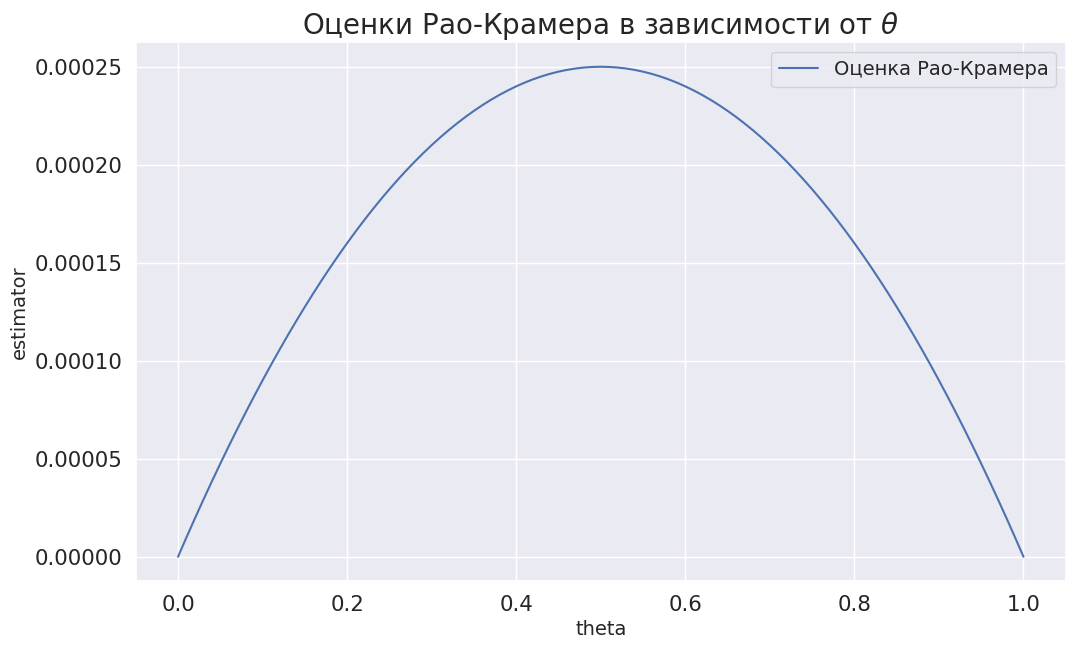

In [155]:
thetas = np.arange(0, 1 + 0.01, 0.01)
n = 1000

plt.figure(figsize=(12,7))
plt.plot(thetas, thetas * (1 - thetas) / n, label='Оценка Рао-Крамера')
plt.title(r'Оценки Рао-Крамера в зависимости от $\theta$', fontsize=20)
plt.xlabel('theta', fontsize=14)
plt.ylabel('estimator', fontsize=14)
plt.legend(fontsize=14, loc=1)

Какой можно сделать вывод (напишите в комментариях)?

**Вывод** Нижняя оценка дисперсии квадратично зависит от значения параметра и достигает максимума при $\theta=0.56$

 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

In [156]:
samples = np.array([sps.bernoulli(theta).rvs(n) for theta in thetas])
bootstrap_est = []

for sample in samples:
    bootstrap_choices = [np.random.choice(sample, size=n, replace=True) for i in range(n)]
    estimators = np.array([np.mean(bootstrap_choices[i]) for i in range(n)])
    bootstrap_est.append(np.var(estimators))


 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

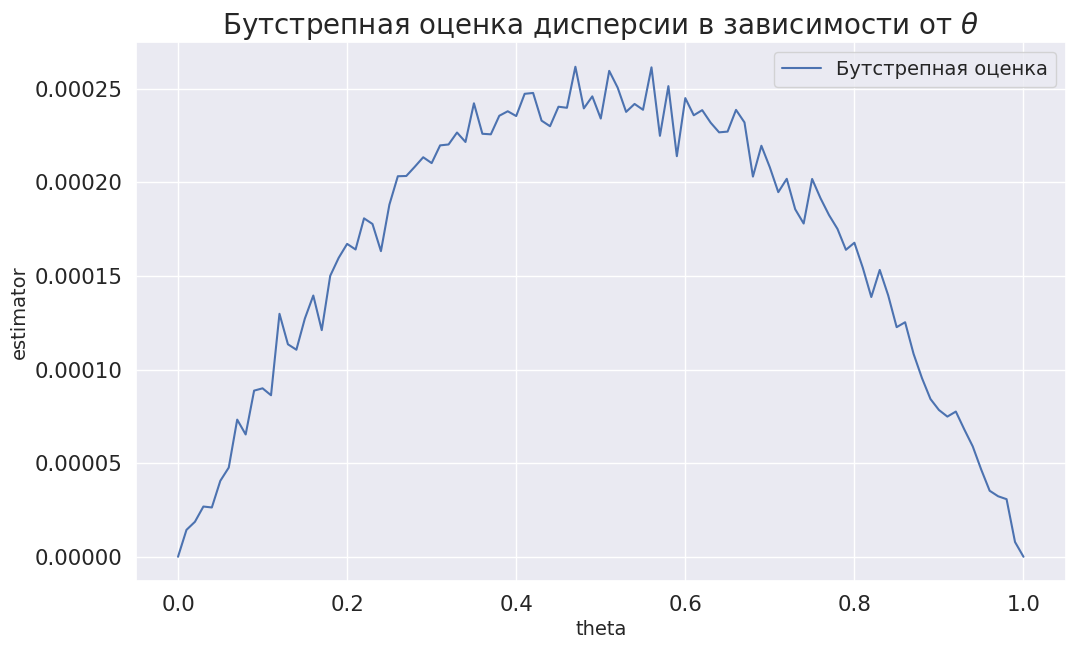

In [157]:
plt.figure(figsize=(12,7))
plt.plot(thetas, bootstrap_est, label='Бутстрепная оценка')
plt.title(r'Бутстрепная оценка дисперсии в зависимости от $\theta$', fontsize=20)
plt.xlabel('theta', fontsize=14)
plt.ylabel('estimator', fontsize=14)
plt.legend(fontsize=14, loc=1)

**Вывод** Графики очень похожи по форме и по значениям. Это подтверждает теорему Рао-Крамера о том, что нижняя оценка дисперсии достигает равенства при эффективной оценке.